# Week2: Homework

## 1. Exploratory Data Analysis

In [1]:
import numpy as np ; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
real = pd.read_csv('C:/Users/kwon/ESC/2020 SPRING/Week 2/real.csv', index_col=0)
real.columns = ['date', 'house_age', 'dist_mrt', 'no_cvs', 'lat', 'long', 'price']
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
No,,,,,,,
1,2012.917,32.0,84.879,10,24.983,121.540,37.9
2,2012.917,19.5,306.595,9,24.980,121.540,42.2
3,2013.583,13.3,561.985,5,24.987,121.544,47.3
4,2013.500,13.3,561.985,5,24.987,121.544,54.8
5,2012.833,5.0,390.568,5,24.979,121.542,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.015,0,24.942,121.504,15.4
411,2012.667,5.6,90.456,9,24.974,121.543,50.0
412,2013.250,18.8,390.970,7,24.979,121.540,40.6


In [3]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       414 non-null    float64
 1   house_age  414 non-null    float64
 2   dist_mrt   414 non-null    float64
 3   no_cvs     414 non-null    int64  
 4   lat        414 non-null    float64
 5   long       414 non-null    float64
 6   price      414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [4]:
real.sort_values(by=['price'], inplace=True)
real.reset_index(inplace=True)
real = real.drop(['No'], axis=1)
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,2013.083,32.0,1156.777,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
409,2012.833,0.0,292.998,6,24.977,121.545,71.0
410,2013.417,0.0,292.998,6,24.977,121.545,73.6
411,2013.583,35.4,318.529,9,24.971,121.541,78.0
412,2013.333,37.2,186.510,9,24.977,121.543,78.3


In [5]:
real.describe()

,date,house_age,dist_mrt,no_cvs,lat,long,price
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


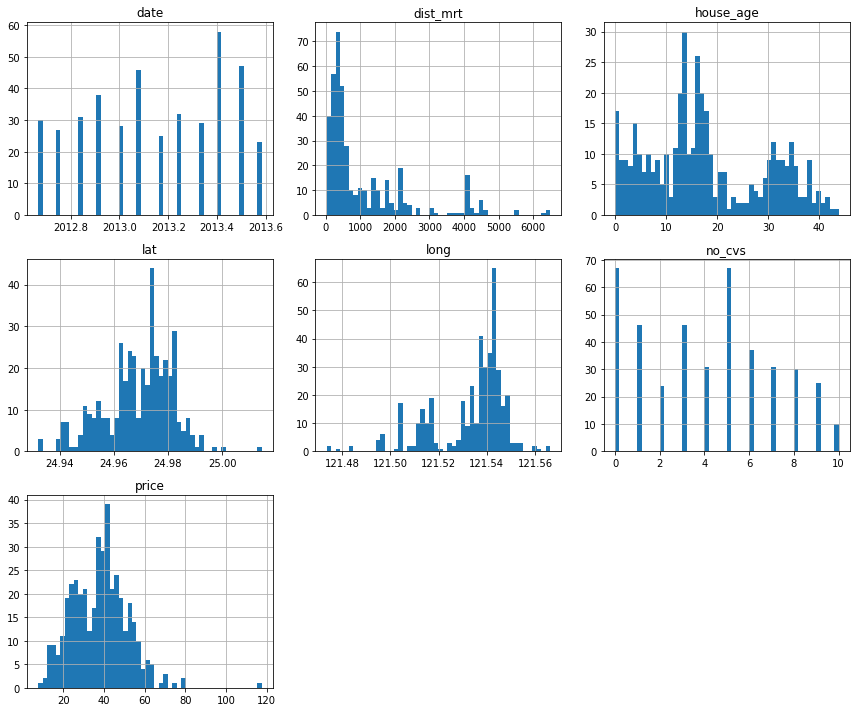

In [6]:
real.hist(bins=50, figsize=(12, 10))
plt.tight_layout()

In [7]:
np.percentile(real.price, 99.5)

77.71400000000001

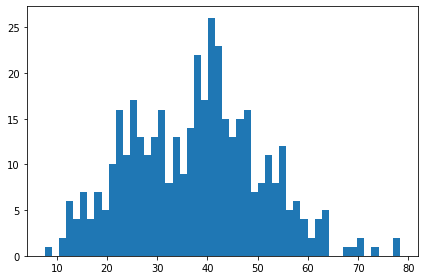

In [8]:
real = real[real.price < 80]
plt.hist(real.price, bins=50)
plt.tight_layout()

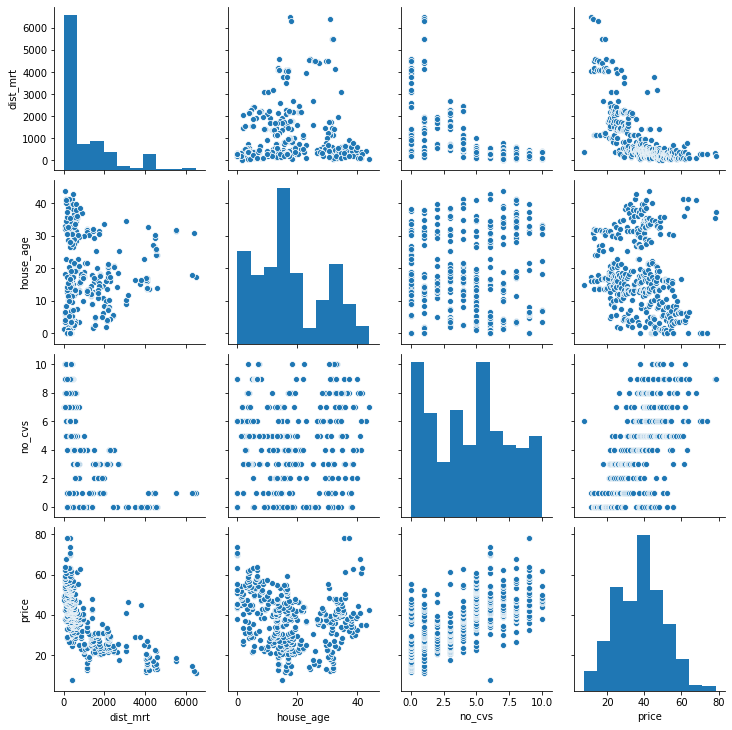

In [9]:
sns.pairplot(real[['dist_mrt', 'house_age', 'no_cvs', 'price']])

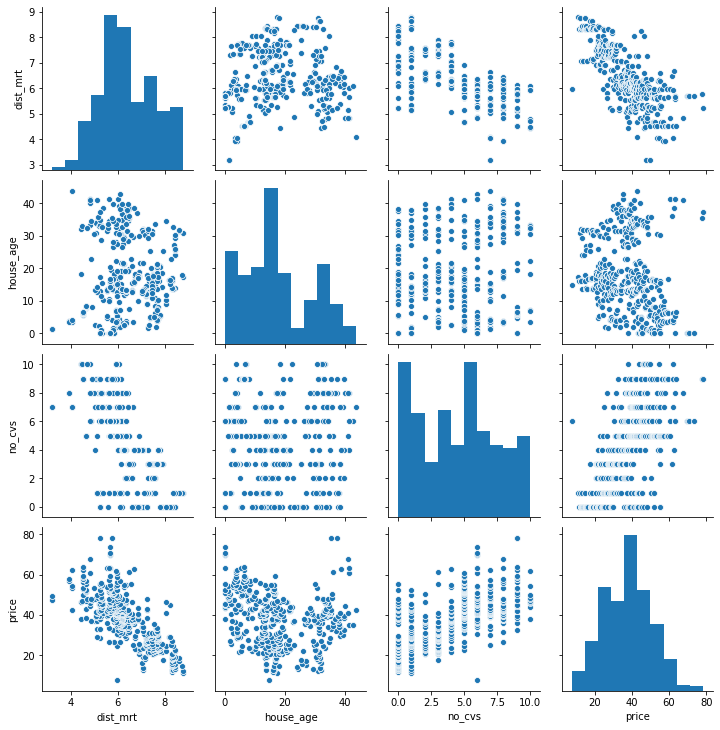

In [10]:
real2 = real.copy()
real2['dist_mrt'] = np.log(1+real.dist_mrt)
sns.pairplot(real2[['dist_mrt', 'house_age', 'no_cvs', 'price']])

## 2. Feature Extraction

In [11]:
data = real2[['dist_mrt', 'house_age', 'price']]
data

,dist_mrt,house_age,price
0,5.977,14.8,7.6
1,8.778,17.4,11.2
2,8.311,16.0,11.6
3,8.764,30.9,12.2
4,7.054,32.0,12.8
...,...,...,...
408,5.684,0.0,70.1
409,5.684,0.0,71.0
410,5.684,0.0,73.6
411,5.767,35.4,78.0


### 1) Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[['dist_mrt', 'house_age']], data[['price']], test_size=0.3, random_state=123)

X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(289, 2) (289, 1)
(124, 2) (124, 1)


In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

def Scl_train(sclr, df):
    colnames = df.columns
    df = sclr.transform(df)
    df = pd.DataFrame(df)
    df.set_axis(colnames, axis=1, inplace=True)
    return df

### 2) Feature-scaling

In [14]:
X_train_sc = Scl_train(scaler, X_train)
X_train_sc.describe()

,dist_mrt,house_age
count,2.890e+02,2.890e+02
mean,1.444e-16,-1.291e-16
std,1.002e+00,1.002e+00
min,-2.832e+00,-1.477e+00
25%,-6.626e-01,-8.222e-01
50%,-1.742e-01,-1.676e-01
75%,8.920e-01,8.573e-01
max,2.058e+00,2.201e+00


In [15]:
X_test_sc = Scl_train(scaler, X_test)
X_test_sc.describe()

,dist_mrt,house_age
count,124.000,124.000
mean,-0.090,0.167
std,0.922,0.928
min,-2.191,-1.477
25%,-0.572,-0.411
50%,-0.210,-0.043
75%,0.540,1.111
max,1.758,2.296


## 3. Linear Basis Model Fitting

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [17]:
def Poly_Reg(X_train, Y_train, X_test, Y_test, m):
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    lin = LinearRegression(fit_intercept=False)
    lin.fit(X_train_poly, Y_train)
    Y_train_pred = lin.predict(X_train_poly)
    Y_test_pred = lin.predict(X_test_poly)
    
    train_MSE = np.sqrt(np.linalg.norm(Y_train - Y_train_pred)**2/Y_train.shape[0])
    test_MSE = np.sqrt(np.linalg.norm(Y_test - Y_test_pred)**2/Y_test.shape[0])
        
    Resid = Y_train - Y_train_pred
        
    return {'coef':lin.coef_, 'train_MSE':train_MSE, 'test_MSE':test_MSE, 'Resid':Resid}

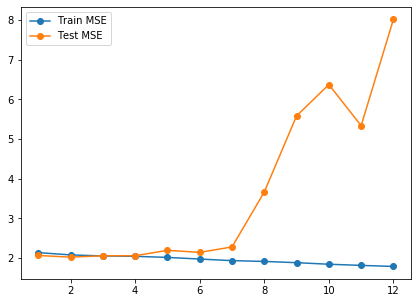

In [18]:
output = pd.DataFrame(columns=['d','Train MSE','Test MSE'])
for i in np.arange(12):
    m = i+1
    Reg = Poly_Reg(X_train_sc, Y_train, X_test_sc, Y_test, m)
    output.loc[i] = [m, Reg['train_MSE'], Reg['test_MSE']]

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(output['d'], np.log(output['Train MSE']), 'o-', label='Train MSE')
ax.plot(output['d'], np.log(output['Test MSE']), 'o-', label='Test MSE')

ax.legend()

## 4. Ridge Regression

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
alphas = np.logspace(-6, 6, 500)

In [20]:
def Ridge_Reg(X_train, Y_train, X_test, Y_test, alphas, fig=False):

    reg = Ridge()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        reg.set_params(alpha=a)
        
        reg.fit(X_train, Y_train)
        
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(X_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(X_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
        
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(X_train.shape[1])]
        for i in range(X_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [[-8.594 -0.167]]


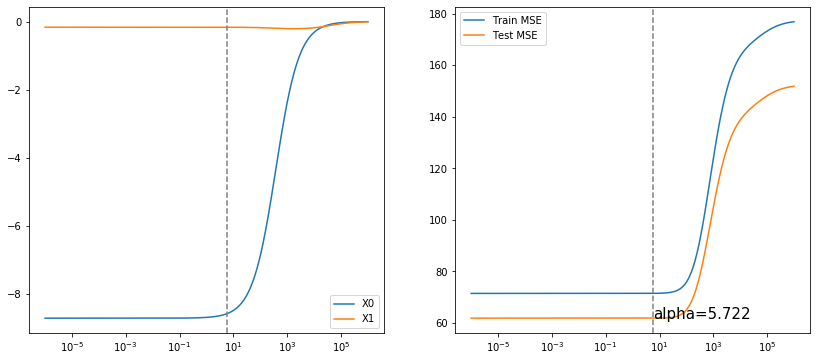

In [21]:
Ridge_output = Ridge_Reg(X_train, Y_train, X_test, Y_test, alphas, fig=True)

## 5. Lasso Regression

In [22]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

In [23]:
def Lasso_Reg(X_train, Y_train, X_test, Y_test, alphas, fig=False):

    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        reg.set_params(alpha=a)
        
        reg.fit(X_train, Y_train)
        
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(X_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(X_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(X_train.shape[1])]
        for i in range(X_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [-8.673 -0.166]


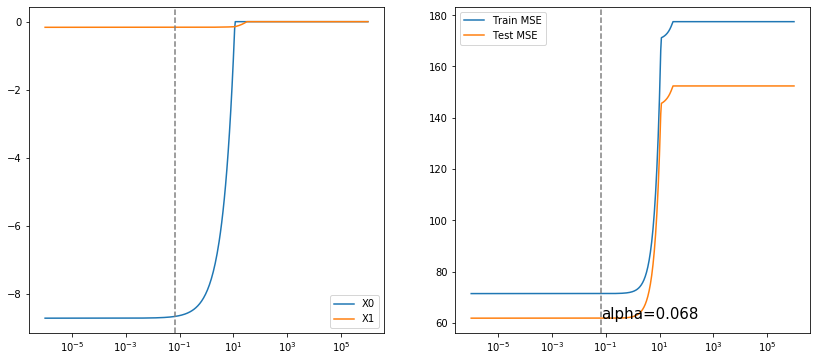

In [24]:
Lasso_output = Lasso_Reg(X_train, Y_train, X_test, Y_test, alphas, fig=True)

## k-fold CV for $\lambda$

In [25]:
import numpy as np
from sklearn.model_selection import KFold

kcv = KFold(n_splits=5, shuffle=True)

kcvMSE_Ridge = np.zeros((kcv.get_n_splits(), alphas.size))
kcvMSE_Lasso = np.zeros((kcv.get_n_splits(), alphas.size))

i = 0
for train_index, test_index in kcv.split(X_train, Y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    CV_X_train, CV_Phi_test = X_train[train_index,:], X_train[test_index,:]
    CV_Y_train, CV_Y_test = Y_train.iloc[train_index,:], Y_train.iloc[test_index,:]
    
    Ridge_output = Ridge_Reg(CV_X_train, CV_Y_train, CV_X_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Ridge[i, :] = Ridge_output['test_MSE']
    
    Lasso_output = Lasso_Reg(CV_X_train, CV_Y_train, CV_X_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Lasso[i, :] = Lasso_output['test_MSE']
    i += 1

TRAIN: [  0   1   2   3   5   6   7   8   9  10  11  13  14  15  17  19  20  21
  24  25  26  27  28  29  30  31  32  35  36  37  38  39  40  41  42  43
  44  46  47  48  49  50  51  52  54  55  56  58  59  60  62  63  64  65
  66  67  69  71  72  73  74  75  76  77  78  80  81  82  83  84  85  86
  87  89  90  91  92  93  94  95  96  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 120 121 122 124 125 127
 128 129 130 131 132 133 134 136 137 138 139 140 142 143 144 145 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 164 165 167 168
 169 171 172 173 174 177 178 179 180 181 182 183 185 186 187 188 189 190
 191 192 194 196 197 200 201 204 205 208 214 215 216 217 221 222 223 224
 225 226 228 229 230 232 233 235 237 238 239 240 242 243 244 245 246 247
 248 249 250 251 252 253 255 256 257 258 259 261 263 264 265 266 267 268
 269 270 271 273 277 278 279 280 281 282 283 284 286 287 288] TEST: [  4  12  16  18  22  23  33  34  45  53  57  61 

TypeError: '(array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  13,  14,
        15,  17,  19,  20,  21,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  46,  47,
        48,  49,  50,  51,  52,  54,  55,  56,  58,  59,  60,  62,  63,
        64,  65,  66,  67,  69,  71,  72,  73,  74,  75,  76,  77,  78,
        80,  81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  92,  93,
        94,  95,  96,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121,
       122, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137,
       138, 139, 140, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 167,
       168, 169, 171, 172, 173, 174, 177, 178, 179, 180, 181, 182, 183,
       185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 197, 200, 201,
       204, 205, 208, 214, 215, 216, 217, 221, 222, 223, 224, 225, 226,
       228, 229, 230, 232, 233, 235, 237, 238, 239, 240, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258,
       259, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 277,
       278, 279, 280, 281, 282, 283, 284, 286, 287, 288]), slice(None, None, None))' is an invalid key